In [27]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {}, x_test.shape : {}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {}, t_test.shape : {}'.format(t_train.shape, t_test.shape))

x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


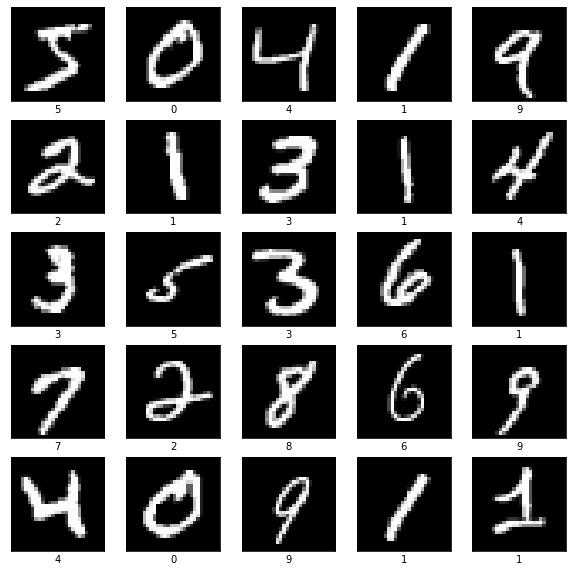

In [29]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [30]:
learning_rate = 0.001
epochs = 30
batch_size = 50

In [31]:
input_ = Input(shape=(28,28,1))

conv1 = Conv2D(kernel_size=(3,3),filters=32,strides=(1,1),activation='relu',padding='SAME')(input_)
pool1 = MaxPool2D(pool_size=(2,2),padding='SAME')(conv1)
dropout1 = Dropout(0.25)(pool1)

conv2 = Conv2D(kernel_size=(3,3),filters=64,strides=(1,1),activation='relu',padding='SAME')(dropout1)
pool2 = MaxPool2D(pool_size=(2,2),padding='SAME')(conv2)
dropout2 = Dropout(0.25)(pool2)

conv3 = Conv2D(kernel_size=(3,3),filters=128,strides=(1,1),activation='relu',padding='SAME')(dropout2)
pool3 = MaxPool2D(pool_size=(2,2),padding='SAME')(conv3)
dropout3 = Dropout(0.25)(pool3)

dropout3_flat = Flatten()(dropout3)
output_ = Dense(10,activation='softmax')(dropout3_flat)

model = Model(inputs=input_, outputs=output_)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                       

In [32]:
model.compile(optimizer=Adam(learning_rate=learning_rate), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [34]:
for layer in model.layers:

    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d_3 (None, 28, 28, 32)
conv2d_4 (None, 14, 14, 64)
conv2d_5 (None, 7, 7, 128)


In [35]:
for idx in range(len(model.layers)):
    print('model.layers[%d] = %s, %s' %(idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = input_2, (None, 28, 28, 1)
model.layers[1] = conv2d_3, (None, 28, 28, 32)
model.layers[2] = max_pooling2d_3, (None, 14, 14, 32)
model.layers[3] = dropout_3, (None, 14, 14, 32)
model.layers[4] = conv2d_4, (None, 14, 14, 64)
model.layers[5] = max_pooling2d_4, (None, 7, 7, 64)
model.layers[6] = dropout_4, (None, 7, 7, 64)
model.layers[7] = conv2d_5, (None, 7, 7, 128)
model.layers[8] = max_pooling2d_5, (None, 4, 4, 128)
model.layers[9] = dropout_5, (None, 4, 4, 128)
model.layers[10] = flatten_1, (None, 2048)
model.layers[11] = dense_1, (None, 10)


# 학습 전 특징맵 시각화

In [36]:
# model의 첫 번째 층 즉, input - conv1 
partial_model = Model(inputs=input_, outputs=conv1)

partial_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


9819


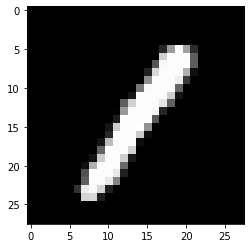

In [37]:
random_idx = np.random.randint(0, len(x_test))

print(random_idx)
plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray')

In [38]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


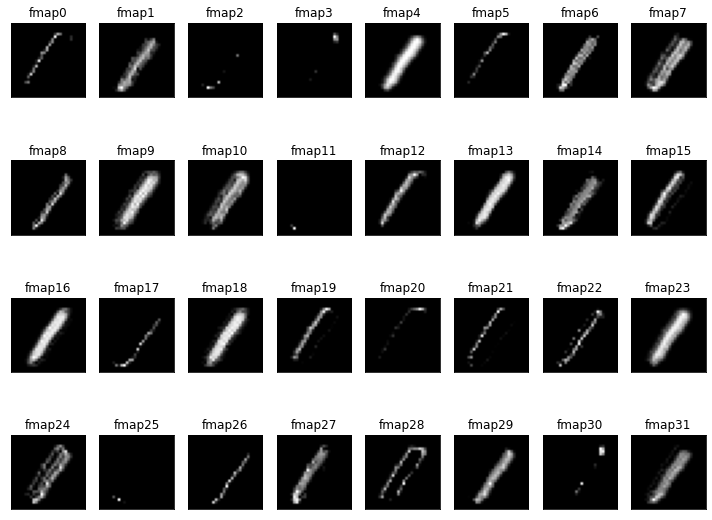

In [39]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('fmap'+str(i))
plt.tight_layout()
plt.show()

# 학습 전 풀링맵 시각화

In [40]:
# model의 두 번째 층 즉, 2번째 층만 떼어냄
partial_model = Model(inputs=input_, outputs=pool1)

partial_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [41]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(pooling_map.shape)

pm = pooling_map[0]

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


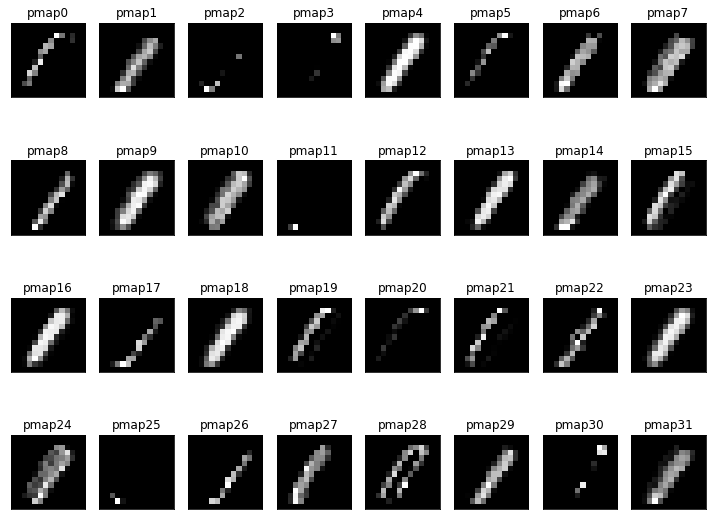

In [42]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('pmap'+str(i))
plt.tight_layout()
plt.show()

# 모델 학습

In [43]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, epochs=epochs,batch_size=batch_size,validation_data=(x_test,t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time-start_time)

Epoch 1/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.2099 - accuracy: 0.9327 - val_loss: 0.0463 - val_accuracy: 0.9847
Epoch 2/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0347 - val_accuracy: 0.9890
Epoch 3/30
1200/1200 [==============================] - 15s 12ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.0277 - val_accuracy: 0.9896
Epoch 4/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0245 - val_accuracy: 0.9907
Epoch 5/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0233 - val_accuracy: 0.9922
Epoch 6/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 7/30
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0262 -

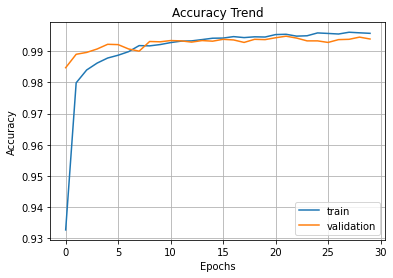

In [44]:
plt.title('Accuracy Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

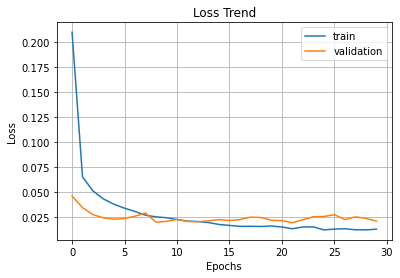

In [45]:
plt.title('Loss Trend')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

# 학습 후 특징맵 시각화

In [46]:
# model의 첫 번째 층 즉, input - conv1 
partial_model = Model(inputs=input_, outputs=conv1)

partial_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [47]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(feature_map.shape)

fm = feature_map[0]

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


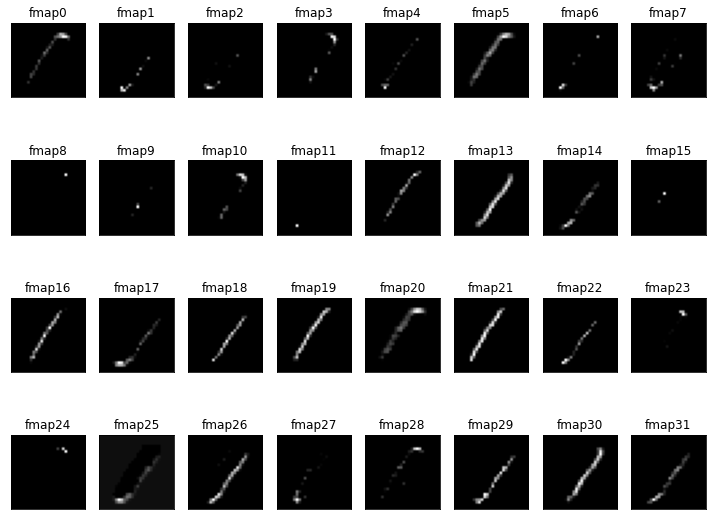

In [48]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('fmap'+str(i))
plt.tight_layout()
plt.show()

# 학습 후 풀링맵 시각화

In [49]:
# model의 두 번째 층 즉, 2번째 층만 떼어냄
partial_model = Model(inputs=input_, outputs=pool1)

partial_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [50]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1))

print(pooling_map.shape)

pm = pooling_map[0]

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


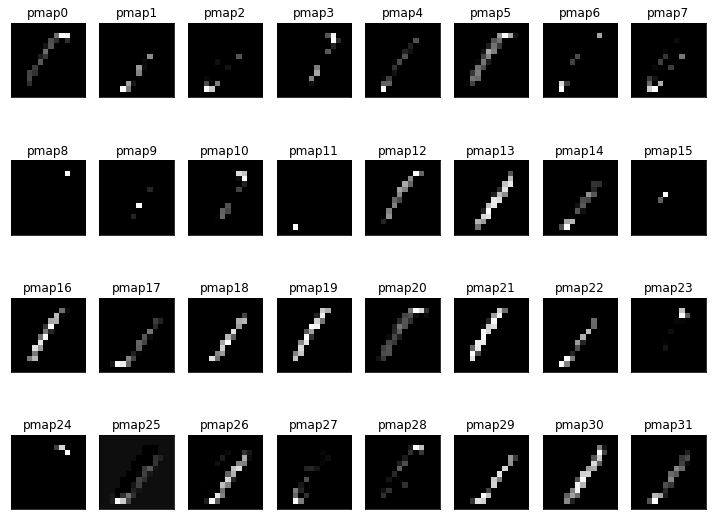

In [51]:
plt.figure(figsize=(10,8))

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title('pmap'+str(i))
plt.tight_layout()
plt.show()